In [3]:
import argparse
import os
import torch
import torch.backends
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from exp.exp_imputation import Exp_Imputation
from exp.exp_short_term_forecasting import Exp_Short_Term_Forecast
from exp.exp_anomaly_detection import Exp_Anomaly_Detection
from exp.exp_classification import Exp_Classification
from utils.print_args import print_args
import random
import numpy as np
from types import SimpleNamespace


In [7]:
args = {
    "task_name": "long_term_forecast",
    "is_training": 1,
    "model_id": "btc_96_96_nontimef_no_scale",
    "model": "TimesNet",
    "data": "custom",
    "root_path": "/home/lchang003/Time-Series-Library/dataset/",
    "data_path": "/home/lchang003/Time-Series-Library/dataset/btc.csv",
    "features": "MS",
    "target": "pct",
    "freq": "t",
    "checkpoints": "/home/lchang003/Time-Series-Library/checkpoints/",
    "seq_len": 96,
    "label_len": 0,
    "pred_len": 10,
    "seasonal_patterns": "Monthly",
    "inverse": False,
    "mask_rate": 0.25,
    "anomaly_ratio": 0.25,
    "expand": 2,
    "d_conv": 4,
    "top_k": 4,
    "num_kernels": 6,
    "enc_in": 16,
    "dec_in": 16,
    "c_out": 1,
    "d_model": 8,
    "n_heads": 8,
    "e_layers": 2,
    "d_layers": 1,
    "d_ff": 8,
    "moving_avg": 25,
    "factor": 3,
    "distil": True,
    "dropout": 0.1,
    "embed": "timeF",
    "activation": "gelu",
    "channel_independence": 1,
    "decomp_method": "moving_avg",
    "use_norm": 1,
    "down_sampling_layers": 0,
    "down_sampling_window": 1,
    "down_sampling_method": None,
    "seg_len": 96,
    "num_workers": 10,
    "itr": 1,
    "train_epochs": 10,
    "batch_size": 9600,
    "patience": 3,
    "learning_rate": 0.0001,
    "des": "Exp",
    "loss": "MSE",
    "lradj": "type1",
    "use_amp": False,
    "use_gpu": False,
    "gpu": 0,
    "gpu_type": "cuda",
    "use_multi_gpu": False,
    "devices": "0,1,2,3",
    "p_hidden_dims": [128, 128],
    "p_hidden_layers": 2,
    "use_dtw": False,
    "augmentation_ratio": 0,
    "seed": 2,
    "jitter": False,
    "scaling": False,
    "permutation": False,
    "randompermutation": False,
    "magwarp": False,
    "timewarp": False,
    "windowslice": False,
    "windowwarp": False,
    "rotation": False,
    "spawner": False,
    "dtwwarp": False,
    "shapedtwwarp": False,
    "wdba": False,
    "discdtw": False,
    "discsdtw": False,
    "extra_tag": "",
    "patch_len": 16,
    "device": "cpu",
}
args = SimpleNamespace(**args)
exp = Exp_Long_Term_Forecast(args)  # set experiments

Use CPU


In [9]:
test_set, test_loader = exp._get_data('test')  # get data
test_set

test 435734


In [13]:
test_set.data_y

array([[ 3.54100000e+00,  4.73600000e+00,  4.11728761e+06, ...,
         6.12699500e+04,  6.12736263e+04, -3.19793766e-04],
       [ 4.87700000e+00,  7.66700000e+00,  3.34080269e+06, ...,
         6.13350500e+04,  6.13143986e+04,  1.06414406e-03],
       [ 8.50400000e+00,  5.58400000e+00,  3.49715612e+06, ...,
         6.12930500e+04,  6.13016658e+04, -6.84762885e-04],
       ...,
       [ 1.17730000e+01,  9.88000000e+00,  3.59097764e+06, ...,
         8.67290500e+04,  8.66903797e+04,  4.77576954e-04],
       [ 1.83900000e+00,  4.52800000e+00,  1.12773996e+06, ...,
         8.67399000e+04,  8.67361879e+04,  1.25678839e-04],
       [ 2.39500000e+00,  4.75600000e+00,  8.20345942e+05, ...,
         8.67537000e+04,  8.67449554e+04,  1.60249205e-04]])

In [15]:
for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
    print(batch_x.shape)
    print(batch_y.shape)
    print(batch_x_mark.shape)
    print(batch_y_mark.shape)

    break


torch.Size([9600, 96, 16])
torch.Size([9600, 10, 16])
torch.Size([9600, 96, 5])
torch.Size([9600, 10, 5])


In [16]:
batch_x_mark

tensor([[[-0.4661, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.0932, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.3983, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466],
  

In [19]:
enc_out = exp.model.enc_embedding(batch_x.float().to('cpu'),None)
enc_out.shape

torch.Size([9600, 96, 8])

In [22]:
exp.model.enc_embedding.value_embedding(batch_x.float().to('cpu')).shape

torch.Size([9600, 96, 8])

In [25]:
enc_out = exp.model.enc_embedding.forward(batch_x.float().to('cpu'),None)

In [28]:
enc_out_1 = exp.model.predict_linear(enc_out.permute(0, 2, 1)).permute(0, 2, 1)

In [33]:
from models.TimesNet import FFT_for_Period
FFT_for_Period(enc_out_1,4)

(array([ 9,  2, 13,  2]),
 tensor([[19873918., 12063305., 11817084., 10756670.],
         [17069580., 10875812., 10812600.,  8715790.],
         [19776814., 14891259.,  9889736.,  9996900.],
         ...,
         [32770640., 22095788., 15830253., 28999344.],
         [36082548., 21888624., 22384384., 23356820.],
         [20732938., 14727906., 25936584., 25190944.]],
        grad_fn=<IndexBackward0>))

In [36]:
#first laryer of timesnet
enc_out_2 = exp.model.model[0](enc_out_1)
enc_out_2.shape

torch.Size([9600, 106, 8])

In [37]:
enc_out_3 = exp.model.layer_norm(enc_out_2)
enc_out_3.shape

torch.Size([9600, 106, 8])

In [38]:
enc_out_4 = exp.model.projection(enc_out_3)
enc_out_4.shape

torch.Size([9600, 106, 1])

In [42]:
enc_out_4[:,-10:,-1:]

tensor([[[-0.3413],
         [-0.2669],
         [ 0.1996],
         ...,
         [-0.0241],
         [-0.3506],
         [ 0.0566]],

        [[-0.3798],
         [-0.6336],
         [ 0.1257],
         ...,
         [ 0.3805],
         [-0.2626],
         [-0.3464]],

        [[-0.4227],
         [-0.1682],
         [ 0.3023],
         ...,
         [-0.3653],
         [-0.9346],
         [-0.9464]],

        ...,

        [[ 0.1431],
         [-0.9160],
         [ 0.3319],
         ...,
         [-0.7860],
         [-0.9124],
         [-0.3662]],

        [[ 0.2538],
         [ 0.1259],
         [ 0.2928],
         ...,
         [-0.4946],
         [-0.6196],
         [-0.1226]],

        [[-0.1587],
         [-0.6593],
         [-0.0476],
         ...,
         [-0.2865],
         [-0.8555],
         [-0.8475]]], grad_fn=<SliceBackward0>)

In [44]:
batch_y[:,-10:,-1:]

tensor([[[-0.0006],
         [ 0.0008],
         [ 0.0010],
         ...,
         [ 0.0004],
         [-0.0003],
         [-0.0006]],

        [[ 0.0008],
         [ 0.0010],
         [ 0.0004],
         ...,
         [-0.0003],
         [-0.0006],
         [ 0.0015]],

        [[ 0.0010],
         [ 0.0004],
         [-0.0003],
         ...,
         [-0.0006],
         [ 0.0015],
         [-0.0007]],

        ...,

        [[-0.0004],
         [ 0.0005],
         [-0.0006],
         ...,
         [-0.0005],
         [ 0.0010],
         [-0.0002]],

        [[ 0.0005],
         [-0.0006],
         [-0.0003],
         ...,
         [ 0.0010],
         [-0.0002],
         [ 0.0003]],

        [[-0.0006],
         [-0.0003],
         [-0.0001],
         ...,
         [-0.0002],
         [ 0.0003],
         [-0.0004]]], dtype=torch.float64)

In [58]:
pred = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/pred.npy", allow_pickle=True)
true = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/true.npy", allow_pickle=True)

In [59]:
import pandas as pd


In [62]:
np.corrcoef(pred.flatten(), true.flatten())

array([[1.        , 0.00147291],
       [0.00147291, 1.        ]])

In [64]:
%matplotlib inline

<Axes: >

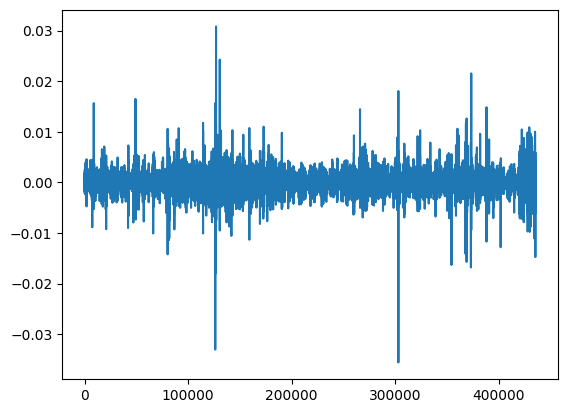

In [70]:
import matplotlib.pyplot as plt
pd.Series(true[:,0,0].flatten()).plot()
plt.show()